<a href="https://colab.research.google.com/github/arcrowell/time_series_final/blob/main/ts_%5Bcrowell%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
# import 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

path1 = r'https://raw.githubusercontent.com/arcrowell/time_series_final/refs/heads/main/final_timeseries_1.csv'
parse1 = pd.read_csv(path1, parse_dates = ['date'])

path2 = r'https://raw.githubusercontent.com/arcrowell/time_series_final/refs/heads/main/final_timeseries_2.csv'
parse2 = pd.read_csv(path2, parse_dates = ['date'])

In [67]:
ts1 = parse1.set_index('date')
ts1 = ts1.sort_index()

In [68]:
ts1

,demand
date,
2022-01-01,NaN
2022-01-02,102.0
2022-01-03,113.0
2022-01-04,125.0
2022-01-05,111.0
...,...
2023-12-27,498.0
2023-12-28,498.0
2023-12-29,499.0


In [69]:
ts2 = parse2.set_index('date')
ts2 = ts2.sort_index()

In [70]:
ts2

,demand
date,
2022-01-01,104.0
2022-01-02,145.0
2022-01-03,138.0
2022-01-04,105.0
2022-01-05,109.0
...,...
2023-12-27,516.0
2023-12-28,468.0
2023-12-29,486.0


In [71]:
full_range_ts1 = pd.date_range(start=ts1.index.min(), end=ts1.index.max(), freq='D')
full_range_ts1

DatetimeIndex(['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04',
               '2022-01-05', '2022-01-06', '2022-01-07', '2022-01-08',
               '2022-01-09', '2022-01-10',
               ...
               '2023-12-22', '2023-12-23', '2023-12-24', '2023-12-25',
               '2023-12-26', '2023-12-27', '2023-12-28', '2023-12-29',
               '2023-12-30', '2023-12-31'],
              dtype='datetime64[ns]', length=730, freq='D')

In [72]:
all_dates_ts1 = full_range_ts1.difference(ts1.index.values)
np.size(all_dates_ts1)

40

In [73]:
count_NaN_ts1 = ts1.isna().sum()
print(count_NaN_ts1)

demand    30
dtype: int64


In [74]:
full_range_ts2 = pd.date_range(start=ts2.index.min(), end=ts2.index.max(), freq='D')
full_range_ts2

DatetimeIndex(['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04',
               '2022-01-05', '2022-01-06', '2022-01-07', '2022-01-08',
               '2022-01-09', '2022-01-10',
               ...
               '2023-12-22', '2023-12-23', '2023-12-24', '2023-12-25',
               '2023-12-26', '2023-12-27', '2023-12-28', '2023-12-29',
               '2023-12-30', '2023-12-31'],
              dtype='datetime64[ns]', length=730, freq='D')

In [75]:
all_dates_ts2 = full_range_ts2.difference(ts2.index.values)
np.size(all_dates_ts2)

40

In [76]:
count_NaN_ts2 = ts2.isna().sum()
print(count_NaN_ts2)

demand    30
dtype: int64


In [77]:
ts1 = ts1.reindex(full_range_ts1)

In [78]:
count_NaN_ts1 = ts1.isna().sum()
print(count_NaN_ts1)

demand    70
dtype: int64


In [79]:
ts2 = ts2.reindex(full_range_ts2)

In [80]:
count_NaN_ts2 = ts2.isna().sum()
print(count_NaN_ts2)

demand    70
dtype: int64


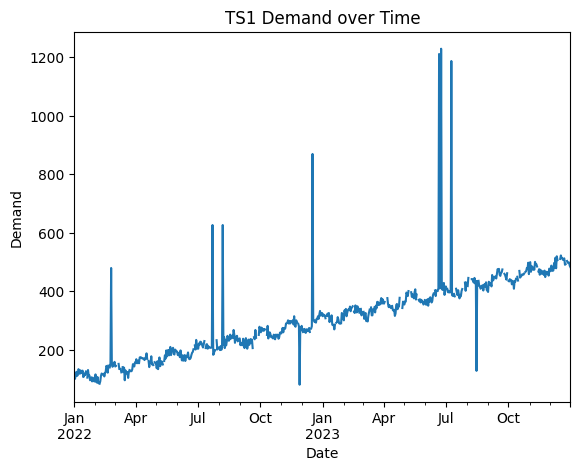

In [81]:
ts1.plot(xlabel='Date', ylabel='Demand', legend=False)
plt.title('TS1 Demand over Time')
plt.show()

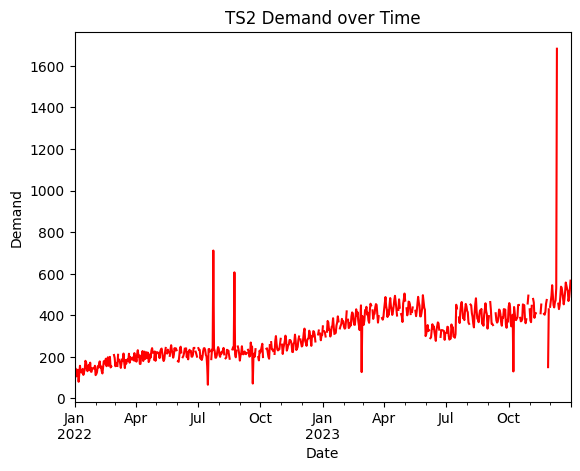

In [82]:
ts2.plot(xlabel='Date', ylabel='Demand', legend=False, color='red')
plt.title('TS2 Demand over Time')
plt.show()

In [83]:
# Fill NaN values using forward fill and backward fill
ts1.fillna(method='ffill', inplace=True)
ts1.fillna(method='bfill', inplace=True)
ts2.fillna(method='ffill', inplace=True)
ts2.fillna(method='bfill', inplace=True)    

/tmp/ipykernel_42225/2413389867.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ts1.fillna(method='ffill', inplace=True)
/tmp/ipykernel_42225/2413389867.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ts1.fillna(method='bfill', inplace=True)
/tmp/ipykernel_42225/2413389867.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ts2.fillna(method='ffill', inplace=True)
/tmp/ipykernel_42225/2413389867.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ts2.fillna(method='bfill', inplace=True)


In [84]:
ts1

,demand
2022-01-01,102.0
2022-01-02,102.0
2022-01-03,113.0
2022-01-04,125.0
2022-01-05,111.0
...,...
2023-12-27,498.0
2023-12-28,498.0
2023-12-29,499.0
2023-12-30,488.0


In [85]:
ts2

,demand
2022-01-01,104.0
2022-01-02,145.0
2022-01-03,138.0
2022-01-04,105.0
2022-01-05,109.0
...,...
2023-12-27,516.0
2023-12-28,468.0
2023-12-29,486.0
2023-12-30,521.0


In [86]:
# Determine outliers using Z-score
from scipy.stats import zscore
z_scores_ts1 = zscore(ts1)
z_scores_ts2 = zscore(ts2)

In [87]:
# List each date that was determined to be an outlier
outliers_ts1 = ts1[(np.abs(z_scores_ts1) > 3)]  # Assuming a threshold of 3 for outliers
outliers_ts2 = ts2[(np.abs(z_scores_ts2) > 3)]  # Assuming a threshold of 3 for outliers
print(outliers_ts1)
print()
print(outliers_ts2)

            demand
2022-12-17   870.0
2023-06-21  1212.0
2023-06-24  1230.0
2023-07-09  1188.0

            demand
2022-07-24   711.0
2023-12-11  1683.0
2023-12-12  1683.0


In [88]:
# Smooth the outliers found in the previous step by replacing them with the mean of the surrounding values
for index, row in outliers_ts1.iterrows():
    mean_value = ts1.loc[index - pd.Timedelta(days=1):index + pd.Timedelta(days=1)].mean()
    ts1.loc[index] = mean_value # Replace the outlier with the mean value of the surrounding values
for index, row in outliers_ts2.iterrows():
    mean_value = ts2.loc[index - pd.Timedelta(days=1):index + pd.Timedelta(days=1)].mean()
    ts2.loc[index] = mean_value  # Replace the outlier with the mean value of the surrounding values

In [89]:
ts1 = ts1.reset_index().rename(columns={'index': 'date'})
ts1.to_csv('ts1_clean.csv', index=False)

In [90]:
ts2 = ts2.reset_index().rename(columns={'index': 'date'})
ts2.to_csv('ts2_clean.csv', index=False)